## Classification - Machine learning

We will be using Social_Network_Ads dataset that contains the information of user like age,gender,salary. Client is a Television company who has launched a new smart TV. We will be trying to see which of the users are going to buy the new TV. Last column in the dataset tells us about if the user has bought it or not.
We are going to build a model to predict if a user is going to buy the TV or not based on Age and salary.

Recommendation for products to the user.
Dataset contains the age of user and outcome-yes or no
Whether the user will buy the product or not



## SVM-Kernel
Find the best decision boundary line which can seperate our space

Line is searched through the maximum margin (distance b/w line and nearest opposite points)
Nearest opposite points are known as vectors hence called s support vectors and algo is called support vector machine.

If we cannot seperate the data with the linear line, we can map it to higher dimension
by squaring the x and dividing the plane or creating a new plane z=x^2+y^2 and seperate the points or taking the mode

There are different Kernels:
    Gaussian RBF Kernel
    Sigmoid Kernel
    Polynomial Kernal...etc

We are going to see Gaussian RBF Kernels

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [3]:
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1,

In [5]:
# Splitting the dataset into the Training set and Test set
#20% test 80% training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [6]:
print(len(x))
len(X_test)

400


80

In [7]:
# Feature Scaling
# since value of salary is very greater than age, so it will be a dominating feature
# we are using StandardScaler= x-mean(x)/Standard_deviation(x)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/home/saumya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
X_train,X_test

(array([[  1.92295008e+00,   2.14601566e+00],
        [  2.02016082e+00,   3.78719297e-01],
        [ -1.38221530e+00,  -4.32498705e-01],
        [ -1.18779381e+00,  -1.01194013e+00],
        [  1.92295008e+00,  -9.25023920e-01],
        [  3.67578135e-01,   2.91803083e-01],
        [  1.73156642e-01,   1.46942725e-01],
        [  2.02016082e+00,   1.74040666e+00],
        [  7.56421121e-01,  -8.38107706e-01],
        [  2.70367388e-01,  -2.87638347e-01],
        [  3.67578135e-01,  -1.71750061e-01],
        [ -1.18475597e-01,   2.20395980e+00],
        [ -1.47942605e+00,  -6.35303205e-01],
        [ -1.28500455e+00,  -1.06988428e+00],
        [ -1.38221530e+00,   4.07691369e-01],
        [ -1.09058306e+00,   7.55356227e-01],
        [ -1.47942605e+00,  -2.00722133e-01],
        [  9.50842613e-01,  -1.06988428e+00],
        [  9.50842613e-01,   5.81523798e-01],
        [  3.67578135e-01,   9.87132798e-01],
        [  5.61999628e-01,  -8.96051849e-01],
        [ -6.04529329e-01,   1.450

In [9]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
svc_classifier = SVC(kernel='rbf',random_state=0)
svc_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
#Predicting the test set results
svc_y_predict = svc_classifier.predict(X_test)
svc_y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [11]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [12]:
#Making a confusion matrix
from sklearn.metrics import confusion_matrix
svc_cm = confusion_matrix(y_test, svc_y_predict)

In [13]:
svc_cm

array([[55,  3],
       [ 1, 21]])

In [14]:
#Calculating the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, svc_y_predict )

0.94999999999999996

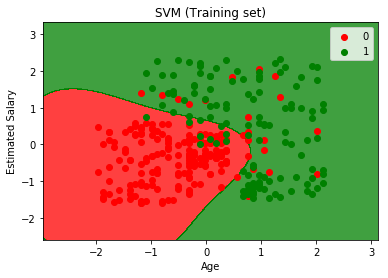

In [15]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svc_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

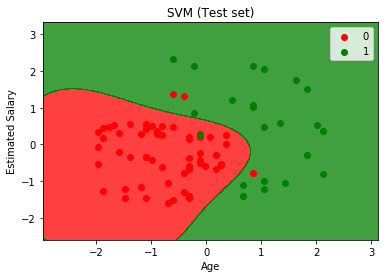

In [16]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svc_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()